In [2]:
#import
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.optimize import curve_fit
import os 
from scipy.optimize import fsolve 
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import cm 

In [3]:
#constants
kBT = 4.114   # pN nm - Boltzmann factor
p = 50        # nm    - persistence length
p_t = 100     # nm    - twist persistence length
w_0 = 1.75    # nm^-1 - omega (??)
R = 4.5       # nm    - radius of nucleosome
h = 10.4      # bp    - basepairs in superhelical turn
t = np.pi     # rad   - fixed forever
  
dG_s = 0      # kBT   - for now, literature values are +/- 6 kBT 

#twist modulus
C = kBT * w_0**2 * p_t #pN

#bending elastic constant
B = p * kBT #nm^2*pN

#definitions

#dG1
def dG1(dG_s,dG_b,dG_t,dG_u):
    return dG_s+dG_b+dG_t+dG_u

#dG_b
def dG_b(B,l,r):
    return (B*l)/(2*r**2)

#dG_t
def dG_t(C,s,l):
    return 0.5*C*s**2*l

#dG_u
def dG_u(u):
    return 0.2*u

#l
def l(link):
    return 0.34*link

#sigma
def s(t,l,h):
    return (t/(2*np.pi))/(l/(h))

#angle of nucleosome
def beta(u):
    return ((u+25)/86)*(2*np.pi)

#lenght of half of the unwrapped part
def l_h(beta):
    return R*np.sin(beta/2)

#angle of the linker DNA loop - small: 0-34 bp
def theta_small(l,l_h,guess):
    func = lambda theta_angle : theta_angle*l_h/np.sin(theta_angle/2)-l
    theta_initial_guess = guess
    theta_solution = fsolve(func, theta_initial_guess)
    return theta_solution

#angle of the linker DNA loop - small: 0-34 bp
def theta_big(l,l_h,guess):
    func = lambda theta_angle : (2*np.pi-theta_angle)*l_h/np.sin(theta_angle/2)-l
    theta_initial_guess = guess
    theta_solution = fsolve(func, theta_initial_guess)
    return theta_solution

#radius of the linker DNA loop
def link_radius(l_h,theta):
    return l_h/np.sin(theta/2)

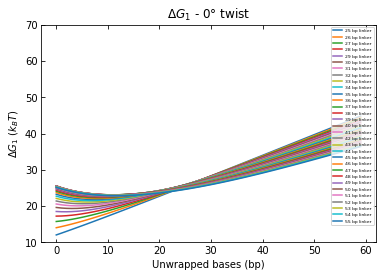

In [4]:
#0 degree twist

t = 0*np.pi     # rad   - 0 twist 

threshold = 34 #basepairs until different equation for theta

for n in range(25,56):

    link_init = n
    
    G_array=[]
    u_array=[]
    stack_array=[]
    twist_array=[]
    unwrap_array=[]
    bend_array=[]

    initial_guess=2
    
    u=0

    for u in range(0,60):
        link=n
        link += u
        
        #bending energy
        L_h=l_h(beta(u))
        if n<=threshold:
            T=theta_small(l(link),L_h,initial_guess)
        else:       
            T=theta_big(l(link),L_h,initial_guess)
        initial_guess=T
        l_r=link_radius(L_h,T)

        G_b=float(dG_b(B,l(link),l_r)/kBT)

        #stacking energy
        G_s=dG_s
        
        #twist energy
        sigma=s(t,link,h)

        G_t=dG_t(C,sigma,l(link))/kBT

        #unwrapping energy

        G_u=dG_u(u)


        #total dG1

        G1=dG1(G_s,G_b,G_t,G_u)

        stack_array.append(G_s)
        twist_array.append(G_t)
        unwrap_array.append(G_u)
        bend_array.append(G_b)
        G_array.append(G1)
        u_array.append(u)


    #plt.plot(u_array,stack_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,bend_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,twist_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,unwrap_array,label=str(link_init)+" bp linker")
    plt.plot(u_array,G_array,label=str(link_init)+" bp linker")

#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_s$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Stacking Energy - $0 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("0_twist_stack.jpg",dpi=1000)
#plt.show()

#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_b$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Bending Energy - $0 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("0_twist_bend.jpg",dpi=1000)
#plt.show()


#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_t$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Twist Energy - $0 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("0_twist_twist.jpg",dpi=1000)
#plt.show()

#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_u ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Unwrapping Energy - $0 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("0_twist_unwrap.jpg",dpi=1000)
#plt.show()

plt.ylim(10,70)
plt.xlabel("Unwrapped bases (bp)")
plt.ylabel("$\Delta G_1$ ($k_BT$)")
plt.legend(loc=1,prop={'size': 4.45},frameon=True)
plt.title("$\Delta G_1$ - $0 \degree$ twist")
plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
plt.savefig("0_twist_total.jpg",dpi=1000)
plt.show()

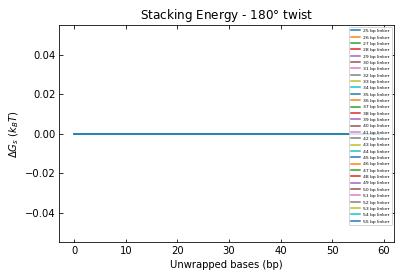

In [5]:
#180 degree twist 

t = 1*np.pi     # rad   - 180 degree twist

threshold = 34 #basepairs until different equation for theta

for n in range(25,56):

    link_init = n
    
    G_array=[]
    u_array=[]
    stack_array=[]
    twist_array=[]
    unwrap_array=[]
    bend_array=[]
    
    initial_guess=2
    
    u=0

    for u in range(0,60):
        link=n
        link += u
        
        #stacking energy
        G_s=dG_s
        
        #bending energy
        L_h=l_h(beta(u))
        if n<=threshold:
            T=theta_small(l(link),L_h,initial_guess)
        else:       
            T=theta_big(l(link),L_h,initial_guess)
        initial_guess=T
        l_r=link_radius(L_h,T)

        G_b=float(dG_b(B,l(link),l_r)/kBT)

        #twist energy
        sigma=s(t,link,h)

        G_t=dG_t(C,sigma,l(link))/kBT

        #unwrapping energy

        G_u=dG_u(u)


        #total dG1

        G1=dG1(G_s,G_b,G_t,G_u)

        stack_array.append(G_s)
        twist_array.append(G_t)
        unwrap_array.append(G_u)
        bend_array.append(G_b)
        G_array.append(G1)
        u_array.append(u)

    plt.plot(u_array,stack_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,bend_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,twist_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,unwrap_array,label=str(link_init)+" bp linker")
    #plt.plot(u_array,G_array,label=str(link_init)+" bp linker")

plt.xlabel("Unwrapped bases (bp)")
plt.ylabel("$\Delta G_s$ ($k_BT$)")
plt.legend(loc=1,prop={'size': 4.45},frameon=True)
plt.title("Stacking Energy - $180 \degree$ twist")
plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
plt.savefig("180_twist_stack.jpg",dpi=1000)
plt.show()

#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_b$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Bending Energy - $180 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("180_twist_bend.jpg",dpi=1000)
#plt.show()


#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_t$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Twist Energy - $180 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("180_twist_twist.jpg",dpi=1000)
#plt.show()

#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_u ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("Unwrapping Energy - $180 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("180_twist_unwrap.jpg",dpi=1000)
#plt.show()

#plt.ylim(10,70)
#plt.xlabel("Unwrapped bases (bp)")
#plt.ylabel("$\Delta G_1$ ($k_BT$)")
#plt.legend(loc=1,prop={'size': 4.45},frameon=True)
#plt.title("$\Delta G_1$ - $180 \degree$ twist")
#plt.tick_params(direction='in',axis="both",bottom="on",top="on",left="on",right="on")
#plt.savefig("180_twist_total.jpg",dpi=1000)
#plt.show()